<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [41]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'Age Group'],
      dtype='object')

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [5]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [15]:
np.unique(boston_df['CHAS'].values)

array([0., 1.])

<Axes: >

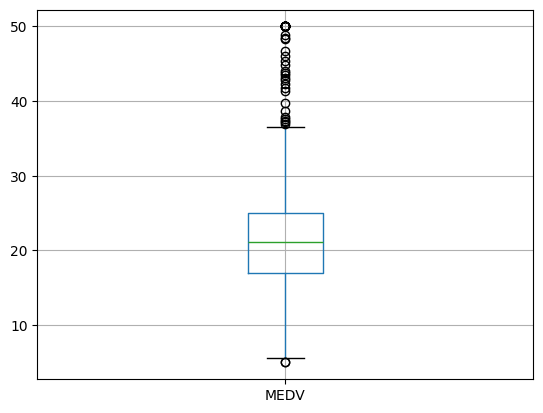

In [7]:
boston_df.boxplot('MEDV')

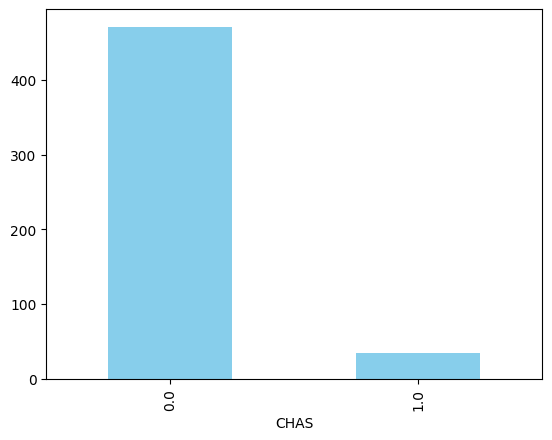

In [30]:
# Creating a vertical bar plot
boston_df['CHAS'].value_counts().plot(kind='bar', color='skyblue')
plt.show()



<Figure size 800x600 with 0 Axes>

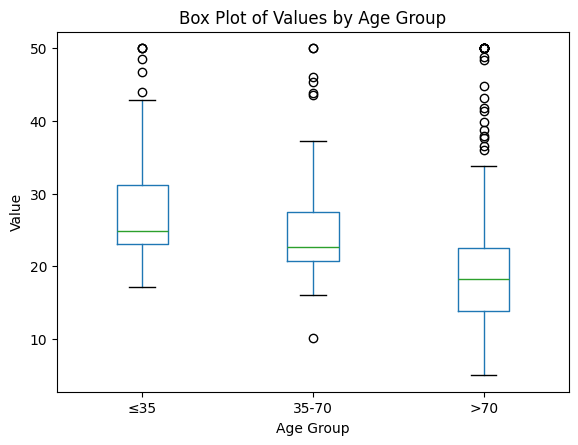

In [39]:
# Discretize age into three groups
bins = [0, 35, 70, np.inf]
labels = ['≤35', '35-70', '>70']
boston_df['Age Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

# Create box plot
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='Age Group', grid=False)
plt.title("Box Plot of Values by Age Group")
plt.suptitle("")  # Remove default suptitle
plt.xlabel("Age Group")
plt.ylabel("Value")
plt.show()

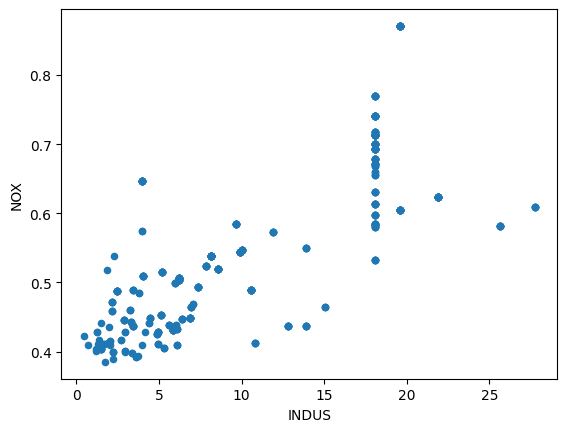

In [34]:
boston_df.plot(kind='scatter', x='INDUS', y='NOX')
plt.show()

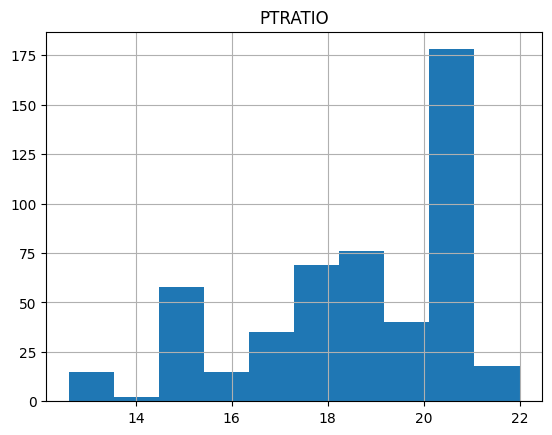

In [37]:
boston_df.hist('PTRATIO')
plt.show()

# tests

In [42]:
df = boston_df

In [44]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

In [45]:
# -----------------------------------------------------------
# 1. T-TEST: Compare MEDV for houses bounded by the Charles River (CHAS)
# -----------------------------------------------------------
# Hypotheses:
#   H0: There is no difference in the mean (or median) MEDV between CHAS=1 and CHAS=0.
#   H1: There is a significant difference.
alpha = 0.05

# Separate the two groups:
medv_chas1 = df[df['CHAS'] == 1]['MEDV']
medv_chas0 = df[df['CHAS'] == 0]['MEDV']

# Perform an independent samples t-test (assuming unequal variances)
t_stat, p_value = stats.ttest_ind(medv_chas1, medv_chas0, equal_var=False)
print("=== T-TEST (CHAS groups) ===")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")
if p_value < alpha:
    print("Conclusion: Reject H0. There is a significant difference in MEDV between houses bounded by the Charles River and those not bounded.")
else:
    print("Conclusion: Fail to reject H0. No significant difference was found in MEDV between the groups.")
print("\n")

# -----------------------------------------------------------
# 2. ANOVA: Compare MEDV across different Age Groups (based on AGE)
# -----------------------------------------------------------
# Hypotheses:
#   H0: The mean MEDV is equal across all Age Groups.
#   H1: At least one Age Group has a different mean MEDV.
group_low = df[df['Age Group'] == 'Low']['MEDV']
group_medium = df[df['Age Group'] == 'Medium']['MEDV']
group_high = df[df['Age Group'] == 'High']['MEDV']

f_stat, p_value = stats.f_oneway(group_low, group_medium, group_high)
print("=== ANOVA (Age Groups) ===")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")
if p_value < alpha:
    print("Conclusion: Reject H0. There are significant differences in MEDV among the Age Groups.")
else:
    print("Conclusion: Fail to reject H0. No significant differences in MEDV among the Age Groups.")
print("\n")

# -----------------------------------------------------------
# 3. Pearson Correlation: Test the relationship between NOX and INDUS
# -----------------------------------------------------------
# Hypotheses:
#   H0: There is no correlation between NOX and INDUS (ρ = 0).
#   H1: There is a significant correlation (ρ ≠ 0).
corr_coeff, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
print("=== Pearson Correlation (NOX vs. INDUS) ===")
print(f"Correlation coefficient: {corr_coeff:.3f}, p-value: {p_value:.3f}")
if p_value < alpha:
    print("Conclusion: Reject H0. There is a significant correlation between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject H0. There is no significant correlation between NOX and INDUS.")
print("\n")

# -----------------------------------------------------------
# 4. Regression Analysis: Effect of DIS on MEDV
# -----------------------------------------------------------
# Hypotheses:
#   H0: The coefficient for DIS is 0 (no effect on MEDV).
#   H1: The coefficient for DIS is not 0 (DIS has an impact on MEDV).
# Here we run a simple linear regression: MEDV = β0 + β1 * DIS + error
X = sm.add_constant(df['DIS'])
y = df['MEDV']
model = sm.OLS(y, X).fit()
print("=== Regression Analysis (MEDV ~ DIS) ===")
print(model.summary())
# You can check the p-value for the DIS coefficient (β1) in the output.
if model.pvalues['DIS'] < alpha:
    print(f"Conclusion: Reject H0. An additional unit of DIS has a statistically significant impact on MEDV (coefficient = {model.params['DIS']:.3f}).")
else:
    print("Conclusion: Fail to reject H0. There is no significant impact of DIS on MEDV.")

=== T-TEST (CHAS groups) ===
t-statistic: 3.113, p-value: 0.004
Conclusion: Reject H0. There is a significant difference in MEDV between houses bounded by the Charles River and those not bounded.


=== ANOVA (Age Groups) ===
F-statistic: nan, p-value: nan
Conclusion: Fail to reject H0. No significant differences in MEDV among the Age Groups.


=== Pearson Correlation (NOX vs. INDUS) ===
Correlation coefficient: 0.764, p-value: 0.000
Conclusion: Reject H0. There is a significant correlation between NOX and INDUS.


=== Regression Analysis (MEDV ~ DIS) ===
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        10:27:38   Log-

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):
